__Bootcamp Report, Rennes School of Business, MSC International Finance 2019__


__Project:    Portfolio Optmation USING K-MEANS ALGORITHM__

__Section 1:__ Definition of our data, collected from the code "data_collection_using_yahoo-finance"

In [3]:
from pylab import plot,show
from numpy import vstack,array
from numpy.random import rand
import numpy as np
from scipy.cluster.vq import kmeans,vq
import pandas as pd
from math import sqrt
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

In [4]:
prices = pd.read_csv('./sp500_joined_closes.csv', delimiter=',', index_col='Date').iloc[:3270,:]
prices

,MMM,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AMD,AAP,AES,...,WLTW,WYNN,XEL,XRX,XLNX,XYL,YUM,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
1999-12-31,28.304659,6.950151,NaN,18.37500,NaN,1.151060,16.561329,14.46875,NaN,30.397175,...,NaN,NaN,8.204436,50.431610,33.010357,NaN,4.633274,NaN,45.304596,NaN
2000-01-03,27.292488,6.698944,NaN,18.25000,NaN,1.235628,16.145748,15.50000,NaN,29.482208,...,NaN,NaN,7.994064,53.765923,33.940575,NaN,4.475831,NaN,42.482033,NaN
2000-01-04,26.208023,6.507545,NaN,17.81250,NaN,1.198042,14.791295,14.62500,NaN,28.313084,...,NaN,NaN,8.178138,51.265186,33.169189,NaN,4.385864,NaN,40.424904,NaN
2000-01-05,26.967150,6.495581,NaN,18.00000,NaN,1.202740,15.083735,15.00000,NaN,28.618069,...,NaN,NaN,8.493693,53.904873,32.443199,NaN,4.408358,NaN,40.377071,NaN
2000-01-06,29.136089,6.722870,NaN,18.03125,NaN,1.179249,15.206868,16.00000,NaN,28.846809,...,NaN,NaN,8.414804,52.793427,29.629946,NaN,4.370872,NaN,40.951149,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-24,79.815117,27.585665,NaN,13.56000,58.228146,10.056446,37.529999,2.48000,69.951729,8.817416,...,81.526779,95.529198,21.399565,16.483768,30.994164,24.585169,39.888184,63.446217,20.090361,NaN
2012-12-26,79.712334,27.412907,NaN,13.67000,57.662735,10.047030,37.549999,2.43000,69.773849,8.792923,...,81.648499,94.705673,21.129187,16.294840,30.882107,24.502817,39.906586,62.954552,19.940224,NaN
2012-12-27,79.344040,27.408689,NaN,13.63000,57.601833,9.971701,37.299999,2.39000,70.505188,8.686785,...,81.897369,94.247208,21.121235,16.072641,30.839008,24.566864,40.164288,63.096371,19.949604,NaN


__Section 2:__ Visualization of a correlatino matrix of the S&P 500 stocks

           MMM       ABT  ABBV      ABMD       ACN
MMM   1.000000  0.794533   NaN -0.125641  0.849417
ABT   0.794533  1.000000   NaN  0.176281  0.944942
ABBV       NaN       NaN   NaN       NaN       NaN
ABMD -0.125641  0.176281   NaN  1.000000  0.602260
ACN   0.849417  0.944942   NaN  0.602260  1.000000


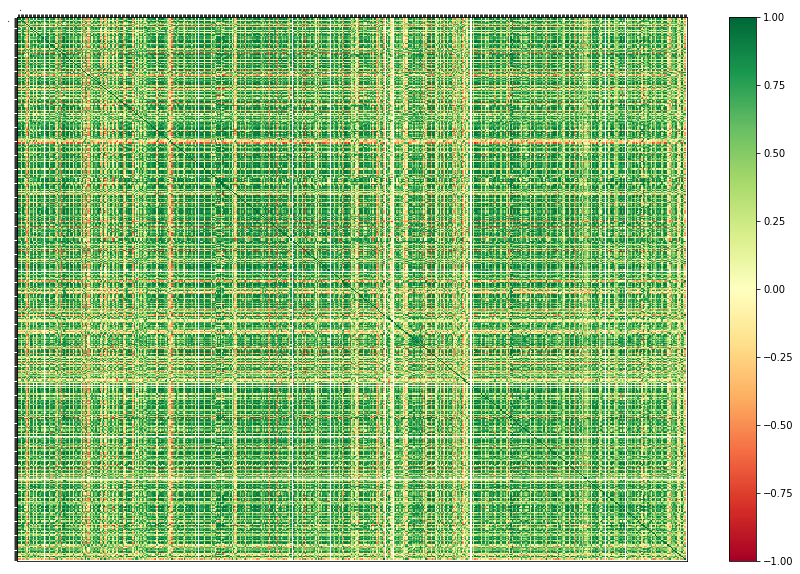

In [5]:
#Print correlation matrix
data_frame = prices
df_corr = data_frame.corr()
print(df_corr.iloc[0:5,0:5])

data = df_corr.values
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(1, 1, 1)

heat_map = ax.pcolor(data, cmap='RdYlGn')
fig.colorbar(heat_map)
ax.set_xticks(np.arange(data.shape[0]) + 0.5, minor=False)
ax.set_yticks(np.arange(data.shape[1]) + 0.5, minor=False)
ax.invert_yaxis()
ax.xaxis.tick_top()
    
#     Show the labels of the table is not possible due to too much stocks there
columns_labels = '.'#data_frame.columns                              #data_frame_correlation.columns
rows_labels = '.' #data_frame.columns                                #data_frame_correlation.index
ax.set_xticklabels(columns_labels)
ax.set_yticklabels(rows_labels)

plt.xticks(rotation=90)
heat_map.set_clim(-1, 1)
    

plt.show()

__Section 3:__ Definition of clusters within our dataframe of S&P 500 prices

In [4]:
#Calculate average annual percentage return and volatilities over a theoretical one year period
prices_df = pd.read_csv('sp500_joined_closes.csv', delimiter=',', index_col='Date')
returns = prices.pct_change().mean() * 252
returns = pd.DataFrame(returns).dropna()
returns.columns = ['Returns']
returns['Volatility'] = prices_df.pct_change().std() * sqrt(252)
#format the data as a numpy array to feed into the K-Means algorithm
data = np.asarray([np.asarray(returns['Returns']),np.asarray(returns['Volatility'])]).T

<Figure size 1800x720 with 0 Axes>

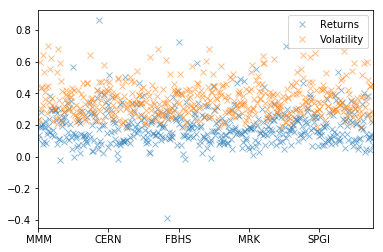

In [5]:
plt.figure(figsize=(25, 10))
returns.plot(style='x', alpha=0.5)

Text(0.5, 1.0, 'Elbow curve')

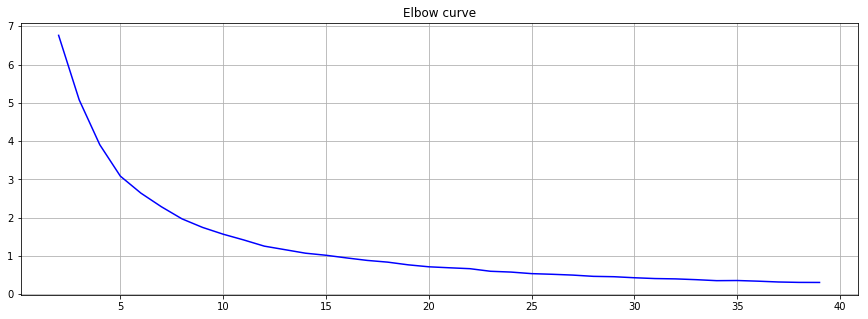

In [6]:
X = data
distorsions = []
for k in range(2, 40):
    k_means = KMeans(n_clusters=k)
    k_means.fit(X)
    distorsions.append(k_means.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 40), distorsions, c='b')
plt.grid(True)
plt.title('Elbow curve')

We choose a number of 5 clusters as the elbow curve seem to "break" around 5 clusters

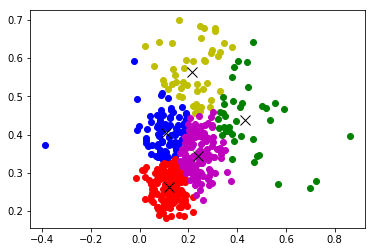

In [7]:
# computing K-Means with K = 5 (5 clusters)
centroids,_ = kmeans(data,5)
# assign each sample to a cluster
idx,_ = vq(data,centroids)

# some plotting using numpy's logical indexing
plot(data[idx==0,0],data[idx==0,1],'ob',
     data[idx==1,0],data[idx==1,1],'oy',
     data[idx==2,0],data[idx==2,1],'or',
     data[idx==3,0],data[idx==3,1],'og',
     data[idx==4,0],data[idx==4,1],'om')
plot(centroids[:,0],centroids[:,1], 'x',markersize=10, c='black')
show()

Handling of outliers be erasing them

In [8]:
#identify the outlier here, we will drop the outliers that make our cluster to shrink
print(returns.idxmax())
returns.head()

Returns       CPRI
Volatility    AKAM
dtype: object


,Returns,Volatility
MMM,0.111619,0.229674
ABT,0.138161,0.236304
ABMD,0.190282,0.594747
ACN,0.200850,0.303027
ATVI,0.279705,0.430685


In [9]:
#drop the relevant stock from our data
returns.drop(['NFLX', 'INCY', 'AKAM'],inplace=True)

# #recreate data to feed into the algorithm
# data = np.asarray([np.asarray(returns['Returns']),np.asarray(returns['Volatility'])]).T

End of section 3: Save our cluster in a list identified by name of ticker and the respective cluster numero

In [10]:
details = [(name,cluster) for name, cluster in zip(returns.index,idx)]
print(type(details))

cluster = pd.DataFrame(details).set_index(0)
# cluster.to_csv('clusterize_ticker')
cluster.columns = ['cluster']
cluster

<class 'list'>


,cluster
0,
MMM,2
ABT,2
ABMD,1
ACN,4
ATVI,4
ADBE,0
AMD,1
AAP,4
AES,1


__Section 4:__ Simulation of random portfolio independently of clusters

(Will serve as a benchmark to compare our final results)

In [11]:
import pandas as pd  
import numpy as np
import datetime
import scipy.optimize as sco
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

df = prices_df
mean_returns = df.pct_change().mean()
print(mean_returns.head(), type(mean_returns))

MMM     0.000502
ABT     0.000600
ABBV    0.000927
ABMD    0.001297
ACN     0.000750
dtype: float64 <class 'pandas.core.series.Series'>


In [18]:
def calc_portfolio_perf(weights, mean_returns, cov, rf):
    portfolio_return = np.sum(mean_returns * weights) * 252
    portfolio_std = np.sqrt(np.dot(weights.T, np.dot(cov, weights))) * np.sqrt(252)
    sharpe_ratio = (portfolio_return - rf) / portfolio_std
    return portfolio_return, portfolio_std, sharpe_ratio

def simulate_random_portfolios(num_portfolios, mean_returns, cov, rf):
    results_matrix = np.zeros((len(mean_returns)+3, num_portfolios))
    for i in range(num_portfolios):
        weights = np.random.random(len(mean_returns)).round(3)
        weights /= np.sum(weights)
        portfolio_return, portfolio_std, sharpe_ratio = calc_portfolio_perf(weights, mean_returns, cov, rf)
        results_matrix[0,i] = portfolio_return
        results_matrix[1,i] = portfolio_std
        results_matrix[2,i] = sharpe_ratio
        #iterate through the weight vector and add data to results array
        for j in range(len(weights)):
            results_matrix[j+3,i] = weights[j]
            
    results_df = pd.DataFrame(results_matrix.T,columns=['ret','stdev','sharpe'] + [ticker for ticker in tickers])
        
    return results_df

In [19]:
# Simulation of random allocation
df = prices_df
tickers = df.columns
mean_returns = df.pct_change().mean()
cov = df.pct_change().cov()
num_portfolios = 10000
rf = 0.0

results_frame = simulate_random_portfolios(num_portfolios, mean_returns, cov, rf)

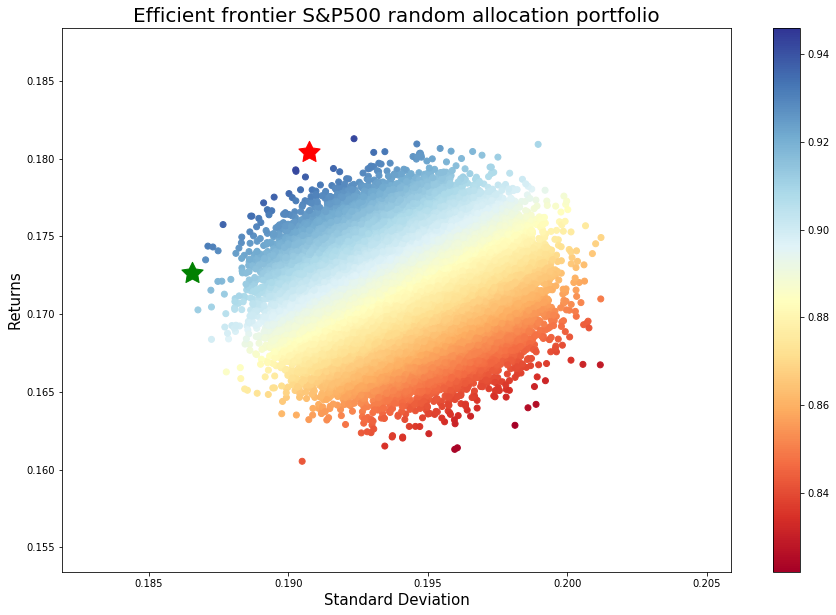

In [381]:
#locate position of portfolio with highest Sharpe Ratio
max_sharpe_port = results_frame.iloc[results_frame['sharpe'].idxmax()]
#locate positon of portfolio with minimum standard deviation
min_vol_port = results_frame.iloc[results_frame['stdev'].idxmin()]
#create scatter plot coloured by Sharpe Ratio
plt.subplots(figsize=(15,10))
plt.scatter(results_frame.stdev,results_frame.ret,c=results_frame.sharpe,cmap='RdYlBu')
plt.title('Efficient frontier S&P500 random allocation portfolio', fontsize=20)
plt.xlabel('Standard Deviation', fontsize=15)
plt.ylabel('Returns', fontsize=15)
plt.colorbar()
#plot red star to highlight position of portfolio with highest Sharpe Ratio
plt.scatter(max_sharpe_port[1],max_sharpe_port[0],marker=(5,1,0),color='r',s=500)
#plot green star to highlight position of minimum variance portfolio
plt.scatter(min_vol_port[1],min_vol_port[0],marker=(5,1,0),color='g',s=500)
plt.show()

In [382]:
def calc_portfolio_std(weights, mean_returns, cov):
    portfolio_std = np.sqrt(np.dot(weights.T, np.dot(cov, weights))) * np.sqrt(252)
    return portfolio_std

def min_variance(mean_returns, cov):
    num_assets = len(mean_returns)
    args = (mean_returns, cov)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bound = (0.0,1.0)
    bounds = tuple(bound for asset in range(num_assets))
    result = sco.minimize(calc_portfolio_std, num_assets*[1./num_assets,], args=args,
                        method='SLSQP', bounds=bounds, constraints=constraints)
    return result

min_port_variance = min_variance(mean_returns, cov)

In [383]:
def calc_neg_sharpe(weights, mean_returns, cov, rf):
    portfolio_return = np.sum(mean_returns * weights) * 252
    portfolio_std = np.sqrt(np.dot(weights.T, np.dot(cov, weights))) * np.sqrt(252)
    sharpe_ratio = (portfolio_return - rf) / portfolio_std
    return -sharpe_ratio

constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

def max_sharpe_ratio(mean_returns, cov, rf):
    num_assets = len(mean_returns)
    args = (mean_returns, cov, rf)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bound = (0.0,1.0)
    bounds = tuple(bound for asset in range(num_assets))
    result = sco.minimize(calc_neg_sharpe, num_assets*[1./num_assets,], args=args,
                        method='SLSQP', bounds=bounds, constraints=constraints)
    return result

optimal_port_sharpe = max_sharpe_ratio(mean_returns, cov, rf)

Now we will replicate this process but instead of using a blind selection of 500 stocks, we will use a random allocation inside of each previously determined clusters, (notice that by doing so we will considerably reduce the computation process)

In [384]:
df = pd.read_csv('sp500_joined_closes.csv', index_col='Date')
tickers = list(df.columns.values)
tickers.remove('APC')
tickers = tickers
ticker = tickers

cluster0 = (cluster.loc[cluster['cluster'] == 0.0])
cluster0 = list(cluster0.index.values)

cluster1 = (cluster.loc[cluster['cluster'] == 1.0])
cluster1 = list(cluster1.index.values)

cluster2 = (cluster.loc[cluster['cluster'] == 2.0])
cluster2 = list(cluster2.index.values)

cluster3 = (cluster.loc[cluster['cluster'] == 3.0])
cluster3 = list(cluster3.index.values)

cluster4 = (cluster.loc[cluster['cluster'] == 4.0])
cluster4 = list(cluster4.index.values)

print(cluster0)

['MMM', 'ABT', 'APD', 'ALXN', 'ADS', 'ALL', 'GOOGL', 'AAL', 'AXP', 'AMP', 'AON', 'AOS', 'ARNC', 'AIZ', 'ATO', 'T', 'ADSK', 'AZO', 'BHGE', 'BBT', 'BRK-B', 'BBY', 'BKNG', 'AVGO', 'BF-B', 'COF', 'KMX', 'CBRE', 'CERN', 'CMG', 'CI', 'CTAS', 'CSCO', 'CME', 'KO', 'CTSH', 'CMCSA', 'CXO', 'STZ', 'CCI', 'DHI', 'DRI', 'DVN', 'DOV', 'DWDP', 'DRE', 'DXC', 'EIX', 'ETR', 'EOG', 'EQIX', 'ES', 'RE', 'EXC', 'EXPE', 'FFIV', 'FIS', 'FITB', 'FRC', 'FISV', 'FLT', 'GE', 'GM', 'GPC', 'GILD', 'HAL', 'HCA', 'HES', 'HON', 'HRL', 'HST', 'IDXX', 'ILMN', 'IP', 'ISRG', 'JEC', 'JBHT', 'JCI', 'JPM', 'KMB', 'KMI', 'KSS', 'LLL', 'LRCX', 'LLY', 'LKQ', 'LOW', 'LYB', 'MTB', 'M', 'MLM', 'MAS', 'MCD', 'MDT', 'MRK', 'MET', 'MTD', 'MCHP', 'MNST', 'MCO', 'NI', 'NBL', 'NSC', 'NVDA', 'PCAR', 'PBCT', 'PEP', 'PFE', 'PNW', 'PXD', 'RL', 'PG', 'PGR', 'PRU', 'PEG', 'PVH', 'REG', 'ROK', 'SWKS', 'SPGI', 'SWK', 'STT', 'SYK', 'SYMC', 'TPR', 'TFX', 'TXN', 'TMO', 'TMK', 'TDG', 'TRV', 'FOX', 'UHS', 'VFC', 'VIAB', 'V', 'WM', 'WAT', 'WEC', 'WCG

In [385]:
# we create a new dataframe that contain our cluster by numero
tickers = cluster0

df = pd.read_csv('sp500_joined_closes.csv', index_col='Date')
df = df.loc[:, cluster0]
# df1 = df.loc[:, cluster1]
# df2 = df.loc[:, cluster2]
# df3 = df.loc[:, cluster3]
# df4 = df.loc[:, cluster4]

df.head()

,MMM,ABT,APD,ALXN,ADS,ALL,GOOGL,AAL,AXP,AMP,...,VIAB,V,WM,WAT,WEC,WCG,WELL,XRX,XYL,ZION
Date,,,,,,,,,,,,,,,,,,,,,
1999-12-31,28.304659,6.950151,18.928173,7.53125,NaN,15.045066,NaN,NaN,36.864788,NaN,...,NaN,NaN,10.705185,26.50000,3.525041,NaN,4.201318,50.431610,NaN,45.304596
2000-01-03,27.292488,6.698944,18.505194,7.37500,NaN,14.693353,NaN,NaN,34.869087,NaN,...,NaN,NaN,10.821970,25.75000,3.490707,NaN,4.270761,53.765923,NaN,42.482033
2000-01-04,26.208023,6.507545,17.941223,6.93750,NaN,14.224422,NaN,NaN,33.552498,NaN,...,NaN,NaN,10.783047,24.50000,3.513596,NaN,4.253399,51.265186,NaN,40.424904
2000-01-05,26.967150,6.495581,18.046970,7.28125,NaN,14.849663,NaN,NaN,32.818943,NaN,...,NaN,NaN,10.821970,26.03125,3.673824,NaN,4.374925,53.904873,NaN,40.377071
2000-01-06,29.136089,6.722870,19.245398,7.75000,NaN,14.771514,NaN,NaN,33.487564,NaN,...,NaN,NaN,10.744119,25.25000,3.662381,NaN,4.600616,52.793427,NaN,40.951149


In [386]:
# Simulation of random allocation

mean_returns = df.pct_change().mean()
cov = df.pct_change().cov()
num_portfolios = 1000
rf = 0.0

results_frame = simulate_random_portfolios(num_portfolios, mean_returns, cov, rf)

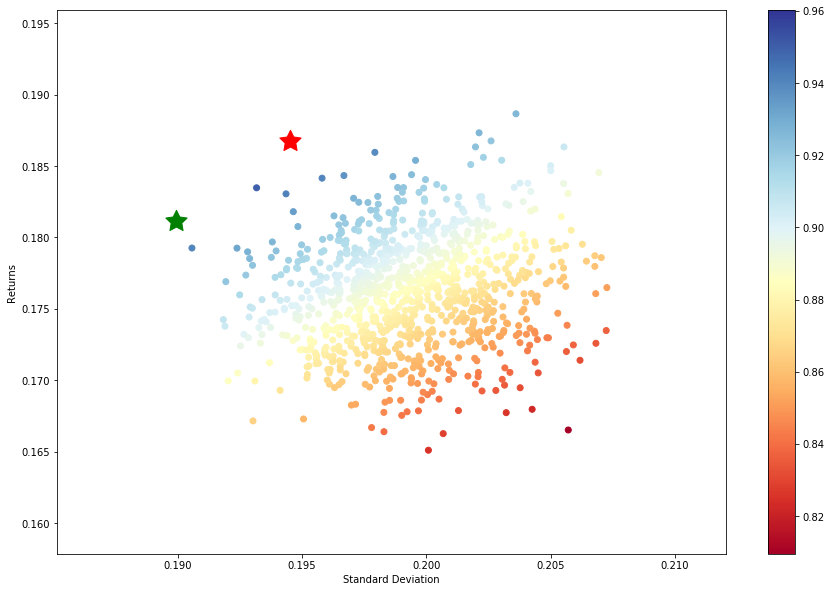

In [387]:
#locate position of portfolio with highest Sharpe Ratio
max_sharpe_port = results_frame.iloc[results_frame['sharpe'].idxmax()]

#locate positon of portfolio with minimum standard deviation
min_vol_port = results_frame.iloc[results_frame['stdev'].idxmin()]

#create scatter plot coloured by Sharpe Ratio
plt.subplots(figsize=(15,10))
plt.scatter(results_frame.stdev,results_frame.ret,c=results_frame.sharpe,cmap='RdYlBu')
plt.xlabel('Standard Deviation')
plt.ylabel('Returns')
plt.colorbar()

#plot red star to highlight position of portfolio with highest Sharpe Ratio
plt.scatter(max_sharpe_port[1],max_sharpe_port[0],marker=(5,1,0),color='r',s=500)

#plot green star to highlight position of minimum variance portfolio
plt.scatter(min_vol_port[1],min_vol_port[0],marker=(5,1,0),color='g',s=500)
plt.show()

Cells below are design to save corresponding max sharpe, min standard deviation

In [7]:
# max_sharpe_port = results_frame.iloc[results_frame['sharpe'].idxmax()]
# df_sharpe = max_sharpe_port.to_frame().T
# max_sharpe = max_sharpe_port.to_frame().T
# max_sharpe.to_csv('max_sharpe_SP500')

# df_sharpe = pd.DataFrame(list(df_sharpe.iloc[:,3:].T.index.values))
# df_sharpe.to_csv('cluster0_maxsharpe')

In [8]:
# df_minsd = pd.DataFrame([round(x,2) for x in min_port_variance['x']],index=tickers).T
# df_minsd.to_csv('opti_minsd_cluster0')

In [9]:
# df_var = min_vol_port.to_frame().T
# df_var = pd.DataFrame(list(df_var.iloc[:,3:].T.index.values))
# df.to_csv('cluster4_minsd')

In [10]:
# df_opti_sharpe = pd.DataFrame([round(x,2) for x in optimal_port_sharpe['x']],index=tickers).T
# df_opti_sharpe.to_csv('opti_sharpe_cluster4')

__Section 5:__ Investigation of maximum sharpe ratio within each cluster


1) We simulate random portfolio on each of this cluster

2) Saved the result as a list of tickers (cf. random_portfolio simulation)

In [393]:
mean_returns = df.pct_change().mean()
mean_returns.head()

df_cmean = pd.concat([cluster, mean_returns], axis=1)
df_cmean.columns = ['cluster', 'return']

c:\users\lucas\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


In [394]:
cluster0_return = (df_cmean.loc[df_cmean['cluster'] == 0.0])
cluster1_return = (df_cmean.loc[df_cmean['cluster'] == 1.0])
cluster2_return = (df_cmean.loc[df_cmean['cluster'] == 2.0])
cluster3_return = (df_cmean.loc[df_cmean['cluster'] == 3.0])
cluster4_return = (df_cmean.loc[df_cmean['cluster'] == 4.0])

__Section 6:__ Concatenate the optimized list of stocks into a single list

In [395]:
list0 = pd.read_csv('opti_sharpe_cluster0')
list1 = pd.read_csv('opti_sharpe_cluster1')
list2 = pd.read_csv('opti_sharpe_cluster2')
list3 = pd.read_csv('opti_sharpe_cluster3')
list4 = pd.read_csv('opti_sharpe_cluster4')

weightlist0 = list0.iloc[:,:][list0.iloc[:,:]>0].dropna(axis=1).T.index.values
weightlist1 = list1.iloc[:,:][list1.iloc[:,:]>0].dropna(axis=1).T.index.values
weightlist2 = list2.iloc[:,:][list2.iloc[:,:]>0].dropna(axis=1).T.index.values
weightlist3 = list3.iloc[:,:][list3.iloc[:,:]>0].dropna(axis=1).T.index.values
weightlist4 = list4.iloc[:,:][list4.iloc[:,:]>0].dropna(axis=1).T.index.values

tickers = np.concatenate((weightlist0, weightlist1, weightlist2, weightlist3, weightlist4), axis=None)
print(tickers, len(tickers))

['ABMD' 'ALGN' 'ALLE' 'ESS' 'GRMN' 'HCA' 'IDXX' 'LMT' 'NEM' 'OKE' 'RSG'
 'SRE' 'VFC' 'ATVI' 'CNC' 'CF' 'DLR' 'DTE' 'FBHS' 'HII' 'IQV' 'PPL' 'UNH'
 'VRSK' 'XYL' 'ATVI' 'CNC' 'CF' 'DLR' 'DTE' 'FBHS' 'HII' 'IQV' 'PPL' 'UNH'
 'VRSK' 'XYL' 'ABBV' 'MO' 'BKNG' 'CBOE' 'CHD' 'DVA' 'EVRG' 'FLT' 'HFC'
 'LW' 'PYPL' 'PBCT' 'REGN' 'SBAC' 'TDG' 'AWK' 'ABC' 'AAPL' 'APTV' 'ANET'
 'CHTR' 'FANG' 'DG' 'FTNT' 'HUM' 'ISRG' 'KEYS' 'MKC' 'MNST' 'NEE' 'ROST'
 'TSCO' 'VTR'] 70


end of section 6: Now we we got our list of tickers that were optimized in each clusters, we will then attribute an equal weight to those stocks, the visualization 

We can note that the final list contain 70 stocks, it's a relatively decent number of stocks in order to eliminate the unsystematic risk of our portfolio.

We will then compare 

__Section 6:__ Visualization of the stocks in our portfolio

In [396]:
from pylab import plot,show
from numpy import vstack,array
from numpy.random import rand
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.cluster.vq import kmeans,vq
import pandas as pd
from math import sqrt
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import datetime
import scipy.optimize as sco
from scipy import stats
import matplotlib.pyplot as plt
from sklearn import preprocessing
%matplotlib inline

In [397]:
list0 = pd.read_csv('opti_sharpe_cluster0')
list1 = pd.read_csv('opti_sharpe_cluster1')
list2 = pd.read_csv('opti_sharpe_cluster2')
list3 = pd.read_csv('opti_sharpe_cluster3')
list4 = pd.read_csv('opti_sharpe_cluster4')

weightlist0 = list0.iloc[:,:][list0.iloc[:,:]>0].dropna(axis=1).T.index.values
weightlist1 = list1.iloc[:,:][list1.iloc[:,:]>0].dropna(axis=1).T.index.values
weightlist2 = list2.iloc[:,:][list2.iloc[:,:]>0].dropna(axis=1).T.index.values
weightlist3 = list3.iloc[:,:][list3.iloc[:,:]>0].dropna(axis=1).T.index.values
weightlist4 = list4.iloc[:,:][list4.iloc[:,:]>0].dropna(axis=1).T.index.values

all_ticker_maxsharpe = np.concatenate((weightlist0, weightlist1, weightlist2, weightlist3, weightlist4), axis=None)
print(len(weightlist0))
print(len(weightlist1))
print(len(weightlist2))
print(len(weightlist3))
print(len(weightlist4))
print(all_ticker_maxsharpe, len(all_ticker_maxsharpe))

13
12
12
15
18
['ABMD' 'ALGN' 'ALLE' 'ESS' 'GRMN' 'HCA' 'IDXX' 'LMT' 'NEM' 'OKE' 'RSG'
 'SRE' 'VFC' 'ATVI' 'CNC' 'CF' 'DLR' 'DTE' 'FBHS' 'HII' 'IQV' 'PPL' 'UNH'
 'VRSK' 'XYL' 'ATVI' 'CNC' 'CF' 'DLR' 'DTE' 'FBHS' 'HII' 'IQV' 'PPL' 'UNH'
 'VRSK' 'XYL' 'ABBV' 'MO' 'BKNG' 'CBOE' 'CHD' 'DVA' 'EVRG' 'FLT' 'HFC'
 'LW' 'PYPL' 'PBCT' 'REGN' 'SBAC' 'TDG' 'AWK' 'ABC' 'AAPL' 'APTV' 'ANET'
 'CHTR' 'FANG' 'DG' 'FTNT' 'HUM' 'ISRG' 'KEYS' 'MKC' 'MNST' 'NEE' 'ROST'
 'TSCO' 'VTR'] 70


In [398]:
df = pd.read_csv('sp500_joined_closes.csv', delimiter=',', index_col='Date').iloc[:3270,:]
df = df.loc[:, all_ticker_maxsharpe]
df.head()

,ABMD,ALGN,ALLE,ESS,GRMN,HCA,IDXX,LMT,NEM,OKE,...,FTNT,HUM,ISRG,KEYS,MKC,MNST,NEE,ROST,TSCO,VTR
Date,,,,,,,,,,,,,,,,,,,,,
1999-12-31,18.37500,NaN,NaN,15.987730,NaN,NaN,4.031250,13.444917,19.787098,1.211396,...,NaN,7.616500,NaN,NaN,9.458017,0.089844,8.834193,1.181396,0.870127,1.719621
2000-01-03,18.25000,NaN,NaN,15.664450,NaN,NaN,4.015625,12.446152,19.433769,1.196329,...,NaN,7.035087,NaN,NaN,8.881793,0.089844,8.511781,1.144349,0.863329,1.642623
2000-01-04,17.81250,NaN,NaN,15.488110,NaN,NaN,3.656250,12.868707,17.969923,1.181262,...,NaN,7.093228,NaN,NaN,9.001008,0.085938,8.666540,1.094952,0.844632,1.642623
2000-01-05,18.00000,NaN,NaN,15.429337,NaN,NaN,3.765625,12.945535,18.171822,1.193316,...,NaN,7.267652,NaN,NaN,9.080488,0.085938,8.950265,1.119651,0.849733,1.616957
2000-01-06,18.03125,NaN,NaN,15.576283,NaN,NaN,3.750000,13.137608,17.969923,1.193316,...,NaN,7.558358,NaN,NaN,8.961269,0.088542,8.950265,1.000276,0.836137,1.642623


Simulation of final portfolio

In [399]:
# we create a new dataframe that contain our cluster by numero
tickers = all_ticker_maxsharpe
df = pd.read_csv('sp500_joined_closes.csv', index_col='Date')
df = df.loc[:, all_ticker_maxsharpe]

In [400]:
# Simulation of random allocation
mean_returns = df.pct_change().mean()
cov = df.pct_change().cov()
num_portfolios = 10000 #Increase the number of portfolio to increase to accuracy
rf = 0.0

results_frame = simulate_random_portfolios(num_portfolios, mean_returns, cov, rf)

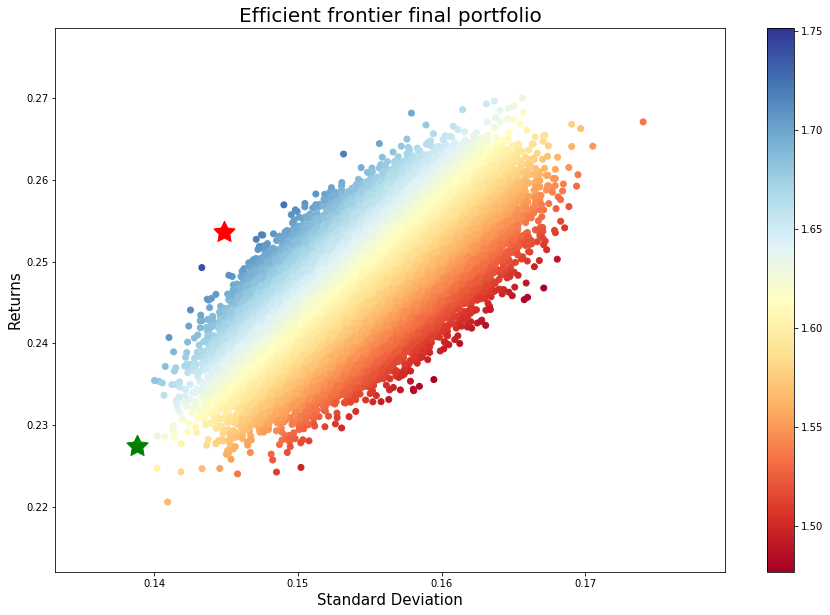

In [401]:
#locate position of portfolio with highest Sharpe Ratio
max_sharpe_port = results_frame.iloc[results_frame['sharpe'].idxmax()]

#locate positon of portfolio with minimum standard deviation
min_vol_port = results_frame.iloc[results_frame['stdev'].idxmin()]

#create scatter plot coloured by Sharpe Ratio
plt.subplots(figsize=(15,10))
plt.scatter(results_frame.stdev,results_frame.ret,c=results_frame.sharpe,cmap='RdYlBu')
plt.title('Efficient frontier final portfolio', fontsize=20)
plt.xlabel('Standard Deviation', fontsize=15)
plt.ylabel('Returns', fontsize=15)
plt.colorbar()

#plot red star to highlight position of portfolio with highest Sharpe Ratio
plt.scatter(max_sharpe_port[1],max_sharpe_port[0],marker=(5,1,0),color='r',s=500)

#plot green star to highlight position of minimum variance portfolio
plt.scatter(min_vol_port[1],min_vol_port[0],marker=(5,1,0),color='g',s=500)
plt.show()

In [1]:
x = dataline.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
dataline = pd.DataFrame(x_scaled)

data = df.pct_change()
dataline = data.rolling(window=252, min_periods=0).mean()


dataline.plot(figsize=(20,20), xscale='log')

NameError: name 'dataline' is not defined

Text(0.5, 1.0, 'Percent change Optimal Sharpe with K-means clustering')

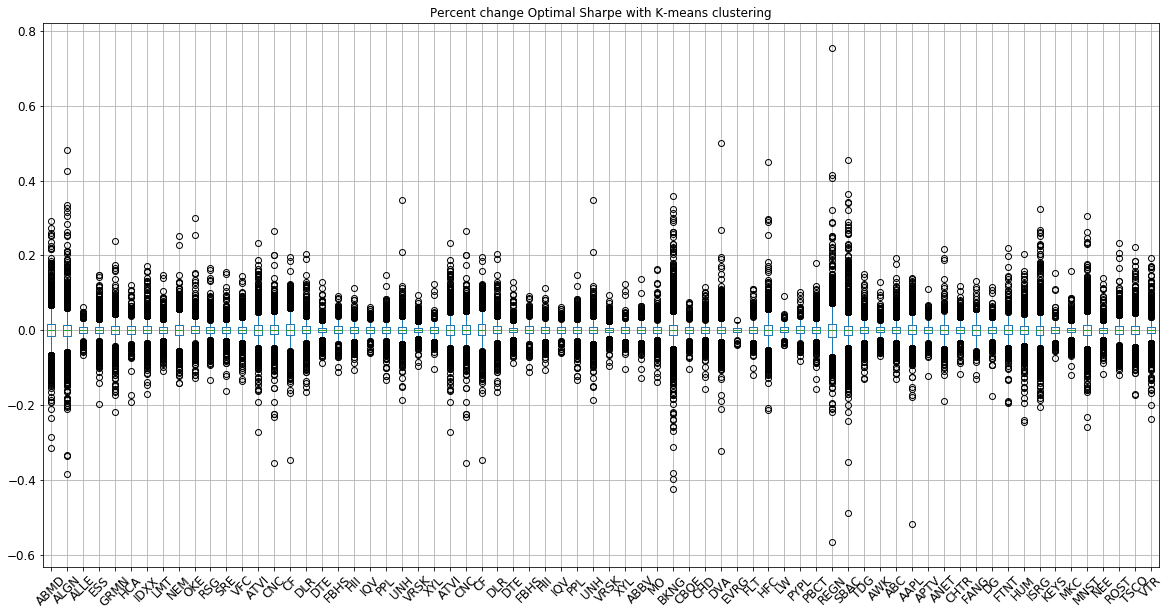

In [404]:
data.boxplot( by=None, ax=None, fontsize=12, rot=45, grid=True, figsize=(20,10), layout=None, return_type=None)
plt.title('Percent change Optimal Sharpe with K-means clustering')

          ABMD      ALGN      ALLE       ESS      GRMN
ABMD  1.000000  0.971465  0.836370  0.726126  0.666660
ALGN  0.971465  1.000000  0.830811  0.770149  0.721383
ALLE  0.836370  0.830811  1.000000  0.910042  0.729895
ESS   0.726126  0.770149  0.910042  1.000000  0.814994
GRMN  0.666660  0.721383  0.729895  0.814994  1.000000


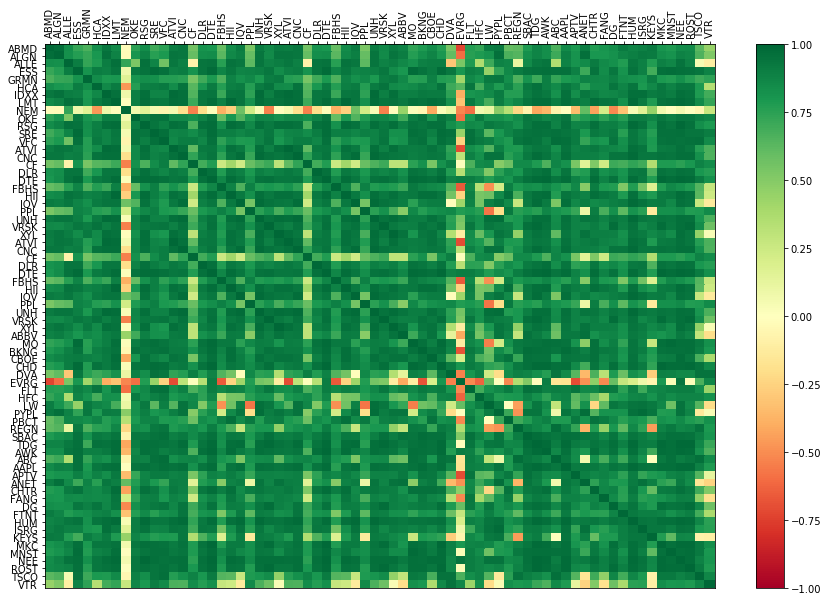

In [405]:
#Print correlation matrix
data_frame = df
df_corr = data_frame.corr()
print(df_corr.iloc[0:5,0:5])

data = df_corr.values
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(1, 1, 1)

heat_map = ax.pcolor(data, cmap='RdYlGn')
fig.colorbar(heat_map)
ax.set_xticks(np.arange(data.shape[0]) + 0.5, minor=False)
ax.set_yticks(np.arange(data.shape[1]) + 0.5, minor=False)
ax.invert_yaxis()
ax.xaxis.tick_top()
    
#     Show the labels of the table (with 500 stocks it's meaningless)
columns_labels = data_frame.columns                              #data_frame_correlation.columns
rows_labels = data_frame.columns                                #data_frame_correlation.index
ax.set_xticklabels(columns_labels)
ax.set_yticklabels(rows_labels)

plt.xticks(rotation=90)
heat_map.set_clim(-1, 1)

plt.show()

In [406]:
df_hca = df.T.pct_change()
df_hca.fillna(0, inplace=True)
import matplotlib.style
import matplotlib as mpl
mpl.style.use('default')

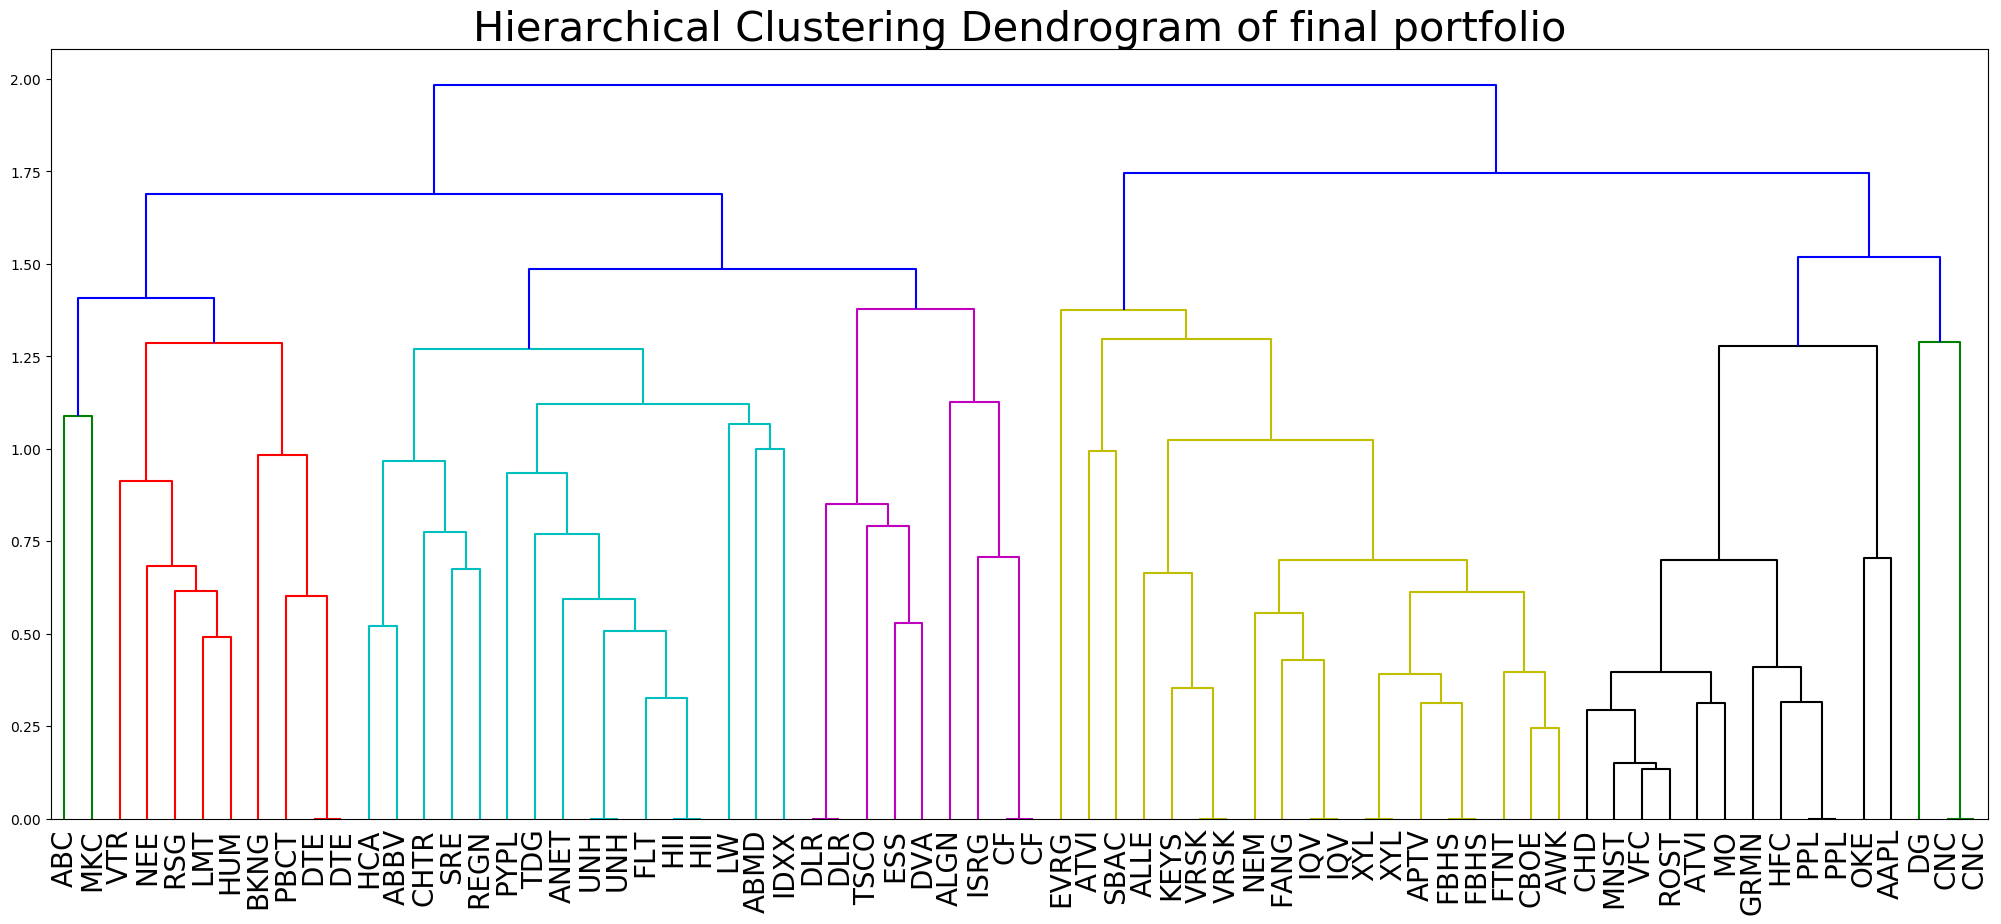

In [407]:
# Normalize the movements: normalized_movements
normalized_movements = normalize(df_hca)

# Calculate the linkage: mergings
mergings = linkage(normalized_movements, method='complete')

labelList = [i for i in df_hca.index]

plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram of final portfolio', fontsize=30)


dendrogram(mergings,
           truncate_mode='level',
           leaf_rotation=90.,
           leaf_font_size=20.,
           labels=labelList,
           show_contracted=True)
plt.show()

mean :  kmean : 0.00116
var  :  kmean : 0.0
sd  :  kmean : 0.00058
sharpe ratio : kmean : 2.023


mean :  sp500 : 0.00076
var  :  sp500 : 0.0
sd  :  sp500 : 0.00045
sharpe ratio : sp500 : 1.671


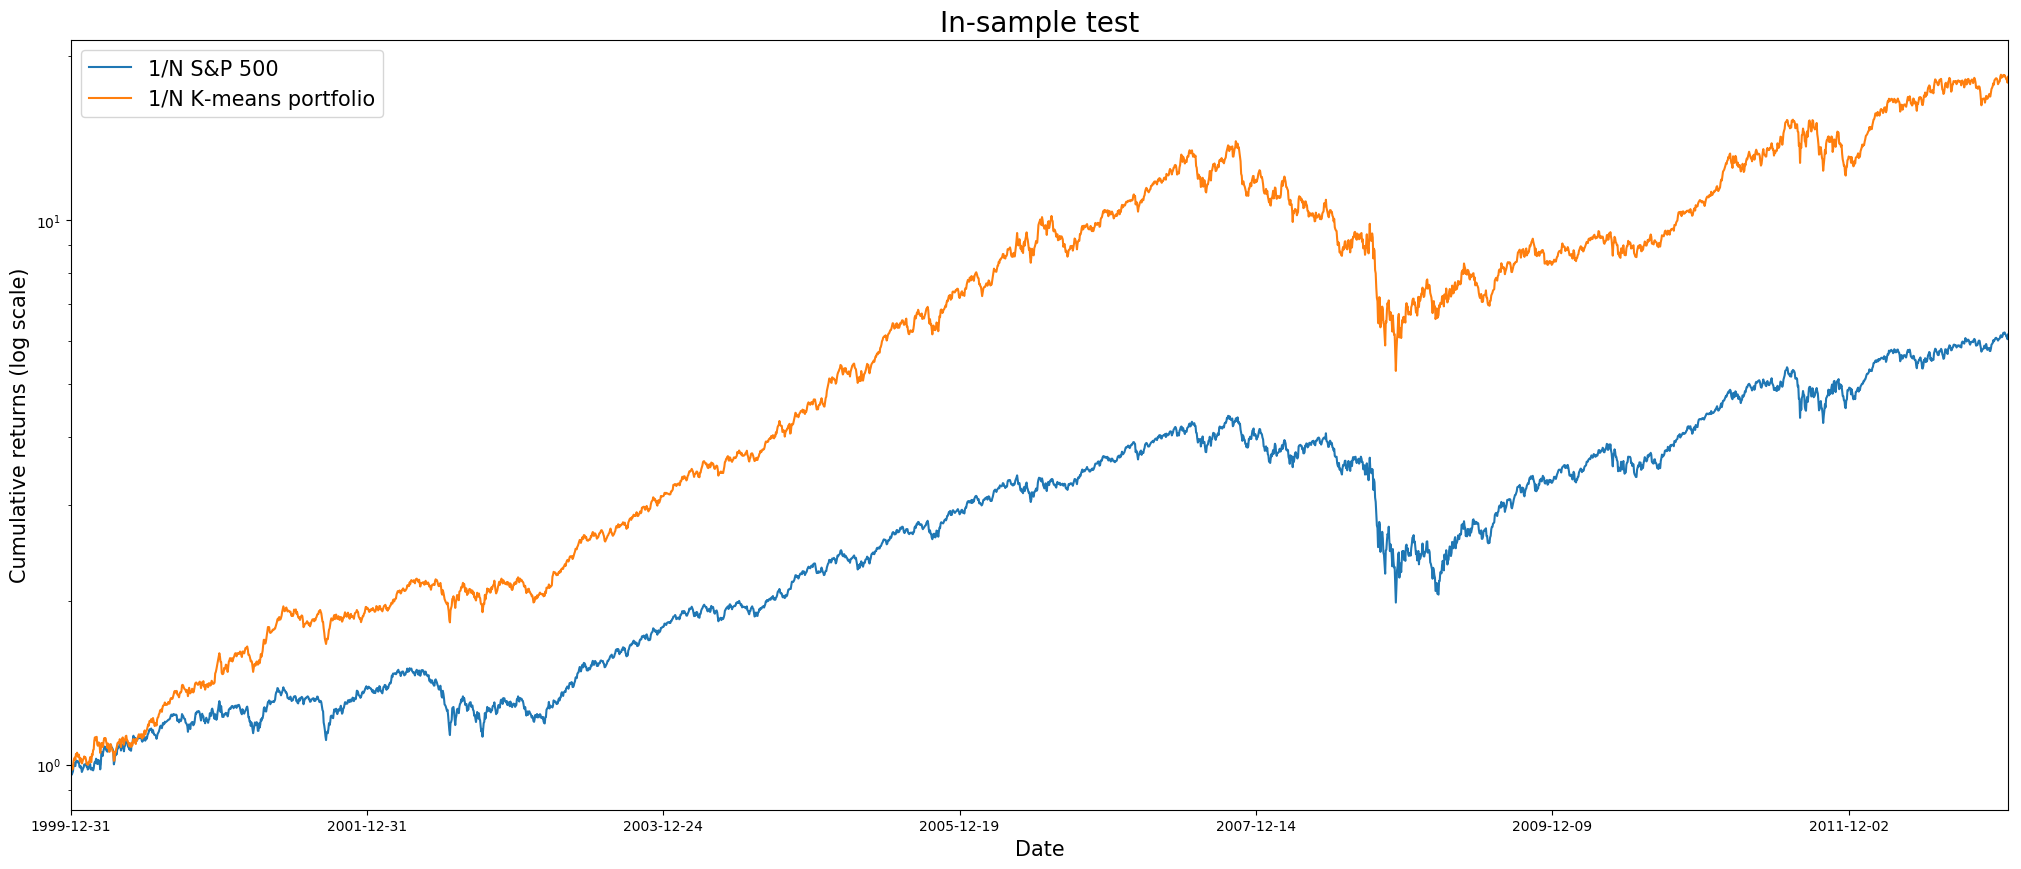

In [408]:
#Plot cumulative returns
prices = pd.read_csv('sp500_joined_closes.csv', index_col='Date')
sp500 = prices.iloc[:3270,:].pct_change()
tickers = prices.T.index
s_p500 = np.exp(np.log1p(sp500[tickers]).cumsum()).T.mean()
s_p500_stat = sp500[tickers].mean()
# cumulative_returnssp

tickers = all_ticker_maxsharpe
kmean = np.exp(np.log1p(sp500[tickers]).cumsum()).T.mean()
kmean_stat = sp500[tickers].mean()


plt.figure(figsize=(25, 10))
plt.title('In-sample test', fontsize=20)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Cumulative returns (log scale)', fontsize=15)
plt.yscale('log')

s_p500.plot(label='1/N S&P 500')
kmean.plot(label='1/N K-means portfolio')
plt.legend(fontsize=15)

print("mean : ", "kmean :", np.mean(kmean_stat).round(5))
print("var  : ", "kmean :", np.var(kmean_stat).round(5))
print("sd  : ", "kmean :", np.std(kmean_stat).round(5))
print("sharpe ratio :", "kmean :", (np.mean(kmean_stat)/np.std(kmean_stat)).round(3))
print()
print()
print("mean : ", "sp500 :", np.mean(s_p500_stat).round(5))
print("var  : ", "sp500 :", np.var(s_p500_stat).round(5))
print("sd  : ", "sp500 :", np.std(s_p500_stat).round(5))
print("sharpe ratio :", "sp500 :", (np.mean(s_p500_stat)/np.std(s_p500_stat)).round(3))

mean :  kmean : 0.0008
var  :  kmean : 0.0
sd  :  kmean : 0.0004
sharpe ratio : kmean : 2.018


mean :  sp500 : 0.00057
var  :  sp500 : 0.0
sd  :  sp500 : 0.00045
sharpe ratio : sp500 : 1.278


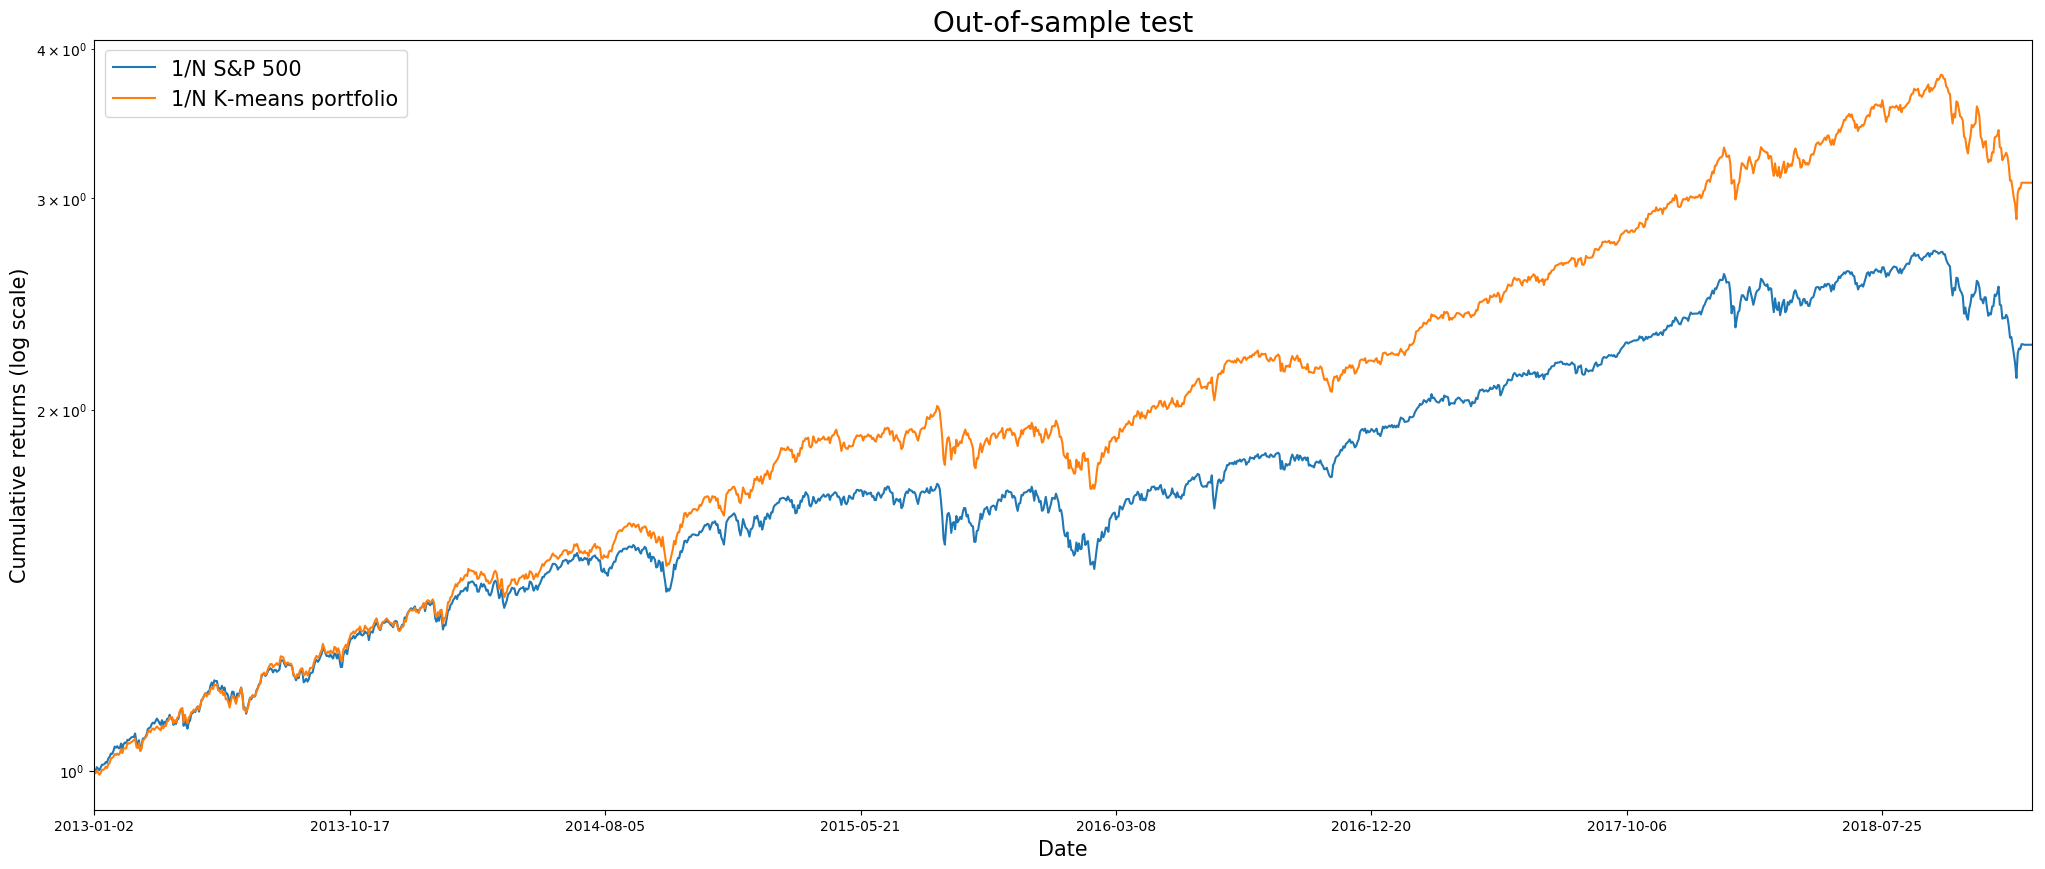

In [409]:
#Plot cumulative returns
prices = pd.read_csv('sp500_joined_closes.csv', index_col='Date')
sp500 = prices.iloc[3270:,:].pct_change()
tickers = prices.T.index
s_p500 = np.exp(np.log1p(sp500[tickers]).cumsum()).T.mean()
s_p500_stat = sp500[tickers].mean()
# cumulative_returnssp

tickers = all_ticker_maxsharpe
kmean = np.exp(np.log1p(sp500[tickers]).cumsum()).T.mean()
kmean_stat = sp500[tickers].mean()


plt.figure(figsize=(25, 10))
plt.title('Out-of-sample test', fontsize=20)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Cumulative returns (log scale)', fontsize=15)
plt.yscale('log')

s_p500.plot(label='1/N S&P 500')
kmean.plot(label='1/N K-means portfolio')
plt.legend(fontsize=15)

print("mean : ", "kmean :", np.mean(kmean_stat).round(5))
print("var  : ", "kmean :", np.var(kmean_stat).round(5))
print("sd  : ", "kmean :", np.std(kmean_stat).round(5))
print("sharpe ratio :", "kmean :", (np.mean(kmean_stat)/np.std(kmean_stat)).round(3))
print()
print()
print("mean : ", "sp500 :", np.mean(s_p500_stat).round(5))
print("var  : ", "sp500 :", np.var(s_p500_stat).round(5))
print("sd  : ", "sp500 :", np.std(s_p500_stat).round(5))
print("sharpe ratio :", "sp500 :", (np.mean(s_p500_stat)/np.std(s_p500_stat)).round(3))